In [1]:
import pandas as pd
import numpy as np

movies_df = pd.read_csv('mkrf_movies.csv')
shows_df = pd.read_csv('mkrf_shows.csv')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Проект кинопроката
Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. 

- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` *—* объём возвратных средств государственной поддержки;
- `nonrefundable_support` *—* объём невозвратных средств государственной поддержки;
- `financing_source` *—* источник государственного финансирования;
- `budget` *—* общий бюджет фильма;
- `ratings` *—* рейтинг фильма на КиноПоиске;
- `genres` *—* жанр фильма.

Обратите внимание, что столбец `budget` **уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. 

Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.

- `puNumber` — номер прокатного удостоверения;
- `box_office` — сборы в рублях.

В рамках проекта нам нужно:
- проверить данные и указать на их проблемы.
- ответить на поставленные вопросы заказчика.
- используя имеющиеся данные, решить задачи от заказчика.

Проверяем категории данных в каждом столбце. Столбец "номер прокатного удостоверения" в таблице movies_df имеет строковый тип данных (object), а в таблице shows_df имеет числовой тип данных (int64). 

In [2]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [3]:
shows_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Чтобы объединить эти 2 таблицы в одну, конвертируем тип данных в колоке "номер прокатного удостоверения" в object. Затем объединим ориетируясь на эту колонку.

In [4]:
shows_df['puNumber'] = shows_df.puNumber.astype(str)

Однако перед тем, как объединять датасеты, мы проверим их на наличие дубликатов и пропусков в shows_df, так как здесь всего 2 колонки. Далее проверим дубликаты в movies_df с "номера прокатного удостоверения".

In [5]:
shows_df.isnull().sum()

puNumber      0
box_office    0
dtype: int64

In [6]:
shows_df.duplicated(subset=['puNumber']).sum()

0

In [7]:
movies_df.duplicated(subset=['puNumber']).sum()

2

В датасете shows_df дубликатов не нашли и пропусков, а в movies_df они есть. Посмотрим и на другие данные этих дублей.

In [8]:
movies_df.loc[movies_df.duplicated(subset=['puNumber'], keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
4638,Как жениться и остаться холостым,221154310,2010-12-17T12:00:00.000Z,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия"
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17T12:00:00.000Z,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история"
5067,Анализируй это!,221054410,2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал"
5068,Анализируй то!,221054410,2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал"


Номер прокатного удостоверения продублировался несколько раз, но как мы видим, одни и те же номера
использовались для разных фильмов при прокате, поэтому удалять их не будем.

Далее посмотрим на дубликаты, фильтруя по колонкам  "название фильма", "режиссёр", "студия-производитель" и "продюсер". Используем именно эти колонки, так как в других данные могут быть одинаковые у большинства фильмов. Однако, чтобы название фильма, режиссёр, студия-производитель и продюсер были одни и те же в одном фильме - очень маловероятно. 

In [9]:
movies_df.duplicated(subset=['title', 'director', 'film_studio', 'producer']).sum()

664

In [10]:
movies_df.loc[movies_df.duplicated(subset=['title', 'director', 'film_studio', 'producer'], keep=False)].sample(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
2779,Голос улиц,221030016,2016-06-21T12:00:00.000Z,Художественный,"Сиркл оф Конфьюжн, Къюб Вижн, Леджендари Пикче...",США,Ф.Гэри Грей,"Мэтт Альварес, Скотт Бернштейн, Айс Кьюб",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.9,"драма,биография,история"
985,Маньяк_,121004813,2013-02-21T12:00:00.000Z,Художественный,"Ле Пти Рейн, Студио 37, Канал +, Сине +, Блю А...",Франция - США,Франк Халфун,"Александр Ажа, Тома Лангманн, Грегори Левассер...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.5,"фантастика,драма,комедия"
1269,Обещание /По произведению Стефана Цвейга/,121009914,2014-05-19T12:00:00.000Z,Художественный,"Фиделите Фильм, Уалд Банч, Скоуп Пикчерз, Оран...",Франция - Бельгия,Патрис Леконт,"Оливье Дебоск, Кристин де Жекель, Марк Миссонье",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.1,"боевик,драма,приключения"
2611,Визит (2015),221029816,2016-06-21T12:00:00.000Z,Художественный,"Блиндинг Эдж Пикчерз, Блюмхауз Продакшнз",США,М. Найт Шьямалан,"Джейсон Блум, Марк Бьенсток, М. Найт Шьямалан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,"ужасы,триллер,детектив"
1348,"Курьер из ""Рая""",111014313,2013-12-18T12:00:00.000Z,Художественный,"ЗАО ""Дирекция Кино"", ООО ""ПРО-СИНЕМА продакшн""",Россия,М.Хлебородов,"А.Максимов, Н.Попов",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.7,"комедия,приключения"


Посчитаем сколько процентов данных теряем, из-за дубликации. 

In [11]:
(len(movies_df.loc[movies_df.duplicated(subset=['title', 'director', 'film_studio', 'producer'], keep=False)]) * 100)/len(movies_df)

15.789473684210526

Удаляем дубликаты из датасета movies_df, но из-за этого теряем примерно 15.8% процентов всех данных.
С датасетом shows_df пока ничего, потому что в нём не было дубликатов.

In [12]:
movies_df_dropped_dup = movies_df.drop_duplicates(subset=['title', 'director', 'film_studio', 'producer'])

Теперь объединим два датасета и назовём его df_merged. Затем исследуем пропущенные данные.
Обратите внимание, что датасете shows_df данные только для 3158 фильмов. Соответственно для остальных фильмов поле о сборах останется пустым (NaN).

In [13]:
df_merged = movies_df_dropped_dup.merge(shows_df, on='puNumber', how='left')

In [14]:
df_merged.sample(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2176,Заложница 3,121028714,2014-12-17T12:00:00.000Z,Художественный,"Европа Корп, Эм 6 Фильм, Канал +, Сине +",Франция,Оливье Мегатон,"Люк Бессон, Мишель Мандавилль",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.2,"боевик,триллер",1.716334e+08
451,Тираннозавр,121006312,2012-03-13T12:00:00.000Z,Художественный,Варп Х,Великобритания,Пэдди Консидайн,NaN,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.0,драма,NaN
2067,Как меня зовут.,111014814,2014-10-27T12:00:00.000Z,Художественный,"ООО ""Продюсерская фирма Игоря Толстунова"", ООО...",Россия,Н.Сайфуллаева,"И.Толстунов, С.Козлов, С.Корнихин",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.1,драма,1.801080e+05
2856,Кукла (2016),121001216,2016-01-14T12:00:00.000Z,Художественный,"Хуай Бразерс Пикчерз, Лэйкшор Интертейнмент, Э...",США,Уильям Брент Белл,"Мэтт Беренсон, Рой Ли, Гэри Лучези",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,6.636145e+07
1680,Джастин и рыцари доблести,124003213,2013-09-27T12:00:00.000Z,Анимационный,Кандор Графикс,Испания,Мануэль Сисилия,"Марселино Алманса, Антонио Бандерас, Керри Фултон",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.3,"мультфильм,приключения,семейный",3.135960e+05


Используя функцию ниже мы получили сумму пропущенных значений по каждому столбцу, где посчитали процент пропущенных значений. Далее рассмотрим каждый столбец по отдельности.

In [15]:
def missing_values(data):
    report = data.isna().sum().to_frame()
    report = report.rename(columns = {0: 'missing_values'})
    report['% of total'] = ((report['missing_values'] / data.shape[0]) *100).round(2)
    display(report)
    total = report['% of total'].mean()
    print('Процент пропущенных значений = ', round(total, 3), sep='', end='')

In [16]:
missing_values(df_merged)

,missing_values,% of total
title,0,0.00
puNumber,0,0.00
show_start_date,0,0.00
type,0,0.00
film_studio,17,0.25
production_country,2,0.03
director,9,0.13
producer,559,8.19
age_restriction,0,0.00
refundable_support,6490,95.13


Процент пропущенных значений = 29.562

Почти 30% данных были пропущенны. Однако надо учитывать, что стобец budget уже включает в себя полный объём государственной поддержки и данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. Соответственно этот столбец актуален только для фильмов, которые получили государственную поддержку, поэтому для других фильмов можем попробовать указать 0, так как они не получали государственную поддержку. Тогда процент пропущенных значений будет меньше. Однако перед этим проверим, а нет ли в этих данных 0. Если они там будут и мы все пропущенные значения заменим нулями, то мы сильно исказим данные.

В пропущенные данные в столбцах 'refundable_support', 'nonrefundable_support' и 'budget' заполним нулями. Для столбца 'financing_source' добавим отдельную категорию "Прочее" для фильмов без гос поддержки.

In [17]:
df_merged[['refundable_support', 'nonrefundable_support', 'budget']].value_counts().index

MultiIndex([(      0.0, 25000000.0,  38000000.0),
            (      0.0, 25000000.0,  38500000.0),
            (      0.0, 26000000.0,  37142857.0),
            (      0.0, 35000000.0,  54687500.0),
            (      0.0, 25000000.0,  37878787.0),
            (      0.0, 30000000.0,  83553412.0),
            (      0.0, 30000000.0,  57874375.0),
            (      0.0, 30000000.0,  48000000.0),
            (      0.0, 30000000.0,  48680858.0),
            (      0.0, 30000000.0,  50000000.0),
            ...
            (3500000.0, 20000000.0,  69428728.0),
            (5000000.0, 35000000.0,  78422212.0),
            (5000000.0, 20000000.0,  48661150.0),
            (5000000.0, 20000000.0,  50000000.0),
            (5000000.0, 20000000.0,  75000000.0),
            (5000000.0, 25000000.0,  46657311.0),
            (5000000.0, 25000000.0, 126932894.0),
            (5000000.0, 30000000.0,  74275100.0),
            (5000000.0, 35000000.0,  62000000.0),
            (      0.0,  3000000.0

Как видим, в этих данных имеются нули, поэтому оставим всё как есть. Там процент пропущенных значений будет выше, то мы не исказим данные.

В столбце "источник государственного финансирования" есть только 3 вида категории, поэтому 4 вид назовём "прочее" для удобства, так как это как раз фильмы, которые не получали государственного финансирования или их источник неизвестен.

In [18]:
df_merged['financing_source'].value_counts()

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

In [19]:
df_merged[['financing_source']] = df_merged[['financing_source']].fillna(value='Прочее')

In [20]:
df_merged['financing_source'].value_counts()

Прочее                              6490
Министерство культуры                164
Фонд кино                            146
Министерство культуры, Фонд кино      22
Name: financing_source, dtype: int64

In [21]:
boolseries_film_studio = pd.isnull(df_merged["film_studio"])
df_merged[boolseries_film_studio]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1176,Stars in Shorts,121011114,2014-06-03T12:00:00.000Z,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Прочее,7.3,комедия,NaN
4056,Мульт личности. Выпуск 5,214000410,2010-01-25T12:00:00.000Z,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Прочее,4.0,"мультфильм,комедия",NaN
5447,Значит любит,111013818,2018-08-10T12:00:00.000Z,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,Прочее,NaN,NaN,NaN
5523,Несейка. Младшая дочь,112007018,2018-09-01T12:00:00.000Z,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,Прочее,NaN,NaN,NaN
5720,Ян Антонышев,112011818,2018-11-15T12:00:00.000Z,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Прочее,NaN,NaN,NaN
5739,Доживем до каникул?..,111021918,2018-11-15T12:00:00.000Z,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,Прочее,NaN,NaN,41225.0
5824,До и После,112014418,2018-12-05T12:00:00.000Z,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Прочее,6.9,"драма,криминал,детектив",NaN
5833,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05T12:00:00.000Z,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Прочее,NaN,NaN,NaN
5836,Мой папа Чингисхан,112014918,2018-12-06T12:00:00.000Z,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Прочее,NaN,NaN,NaN
5837,В плену города грёз,112014818,2018-12-06T12:00:00.000Z,Документальный,NaN,Россия,В.Витовцев,О.Мичи,«18+» - запрещено для детей,NaN,NaN,NaN,Прочее,7.9,"фантастика,боевик,триллер",NaN


В столбце "студия-производитель" пропущены 17 значений. Большинство из них относятся к фильмам российского производства. 
Для фильма "Stars in Shorts" на сайте IMDb можно найти информации о студии-производителе. Их было 3: Biscuit Pictures, Mission Filmworks, Contemptible Entertainment. Данные добавим ниже.

In [22]:
df_merged.at[1176, 'film_studio'] = "Biscuit Pictures, Mission Filmworks, Contemptible Entertainment"

Для остальных российских фильмов на сайте Кинопоиска отсутствует информация о студии-производителе, поэтому пока их оставляем пропущенными.

In [23]:
boolseries_production_country = pd.isnull(df_merged["production_country"])
df_merged[boolseries_production_country]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2904,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09T12:00:00.000Z,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Прочее,7.2,"детский,комедия",194527.0
4056,Мульт личности. Выпуск 5,214000410,2010-01-25T12:00:00.000Z,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Прочее,4.0,"мультфильм,комедия",NaN


В столбце "страна-производитель" пропущены 2 значения для российских мультфильмов "Ералаш" и "Мультличности". Они были произведены в России. Данные добавим ниже.

In [24]:
df_merged[["production_country"]] = df_merged[["production_country"]].fillna(value='Россия')

In [25]:
boolseries_director = pd.isnull(df_merged["director"])
df_merged[boolseries_director]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
700,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04T12:00:00.000Z,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Прочее,NaN,NaN,44350.0
1575,Помпеи. Британский музей,126003413,2013-09-11T12:00:00.000Z,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Прочее,NaN,NaN,NaN
3550,Зур концерт (Большой концерт).,217027010,2010-06-24T12:00:00.000Z,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Прочее,NaN,NaN,NaN
3741,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22T12:00:00.000Z,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Прочее,NaN,NaN,NaN
3946,Изге Вэли (Святой Валентин),217020610,2010-05-20T12:00:00.000Z,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Прочее,NaN,NaN,NaN
4037,Bon Jovi. The Circle Tour,126001710,2010-11-11T12:00:00.000Z,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Прочее,7.9,"концерт,музыка",NaN
4056,Мульт личности. Выпуск 5,214000410,2010-01-25T12:00:00.000Z,Художественный,NaN,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Прочее,4.0,"мультфильм,комедия",NaN
4399,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25T12:00:00.000Z,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Прочее,NaN,NaN,NaN
4417,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11T12:00:00.000Z,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Прочее,6.7,"концерт,музыка",NaN


В столбце "режиссёр" информация пропущена в основном у записей концертов живых выступлений. 
В открытых источниках не смог найти информацию о режиссёрах. Вероятнее всего, потому что их и не было, так как для таких фильмов обычно используют монтаж записей видео, которые сделаны во время самого концерта.

In [26]:
boolseries_producer = pd.isnull(df_merged["producer"])
df_merged[boolseries_producer].sample(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6399,... имени Сергея Герасимова,113001019,2019-07-05T12:00:00.000Z,Научно-популярный,Майоров Сергей Викторович,Россия,С.Майоров,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Прочее,5.4,драма,NaN
4570,"Все, что ты хочешь",121007211,2011-05-06T12:00:00.000Z,Художественный,Беллатрикс Филмс ЭС.Эл,Испания,Ахеро Манас,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Прочее,6.7,"фэнтези,мелодрама,комедия",NaN
2207,Приговоренный_,111024414,2014-12-24T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,А.Кордон,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Прочее,8.0,"триллер,драма,военный",NaN
2072,"Корона Российской империи, или снова неуловимые",111017214,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Э.Кеосаян,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Прочее,7.3,"боевик,приключения,история",6630.0
22,Неисправимый лгун,111003516,2016-02-12T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Азаров,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Прочее,7.7,комедия,NaN


In [27]:
df_merged[boolseries_producer]['production_country'].value_counts()

СССР                                                                    340
Россия                                                                   38
Великобритания                                                           33
США                                                                      21
СССР                                                                     20
                                                                       ... 
Украина                                                                   1
 СССР                                                                     1
США - Великобритания - Германия - Новая Зеландия - Бельгия - Франция      1
СССР, Албания                                                             1
Индия                                                                     1
Name: production_country, Length: 70, dtype: int64

В столбце "продюссер" пропущены 559 значений. Если сделать разбивку по странам, то наталкиваем на совсем иную проблему. 
Данные были записаны не в едином формате. Например, СССР сгрупирован 3 раза, так как каждый использовался другой формат записи. 
Где-то лишние пробелы и отступы. Также заметим, что если фильм снимался в разных странах, то есть в столбце "страна-производитель" указываются несколько стран. Некоторые указаны через черточку, а некоторые через запятую. Детально это можно увидеть ниже.

In [28]:
 df_merged['production_country'].value_counts().index

Index(['Россия', 'США', 'СССР', 'Франция', 'Великобритания', 'Италия',
       'Германия', 'Япония', 'Испания', 'США - Великобритания',
       ...
       'США-Франция-Ирландия', 'Германия - Великобритания - Италия - Испания',
       'Австрия-Франция-Германия', 'Австрия - Люксембург',
       'Франция - Чехия - Великобритания',
       'Израиль - Германия - Франция - Швейцария', 'Мексика - Тайвань - США',
       'США-Великобритания-Индия', 'Франция - Дания',
       'Япония - Великобритания - Швейцария - Ирландия - Дания - Франция - Польша - Австралия - Канада  '],
      dtype='object', length=950)

In [29]:
df_merged['production_country'].value_counts(normalize=True)

Россия                                                                                              0.265904
США                                                                                                 0.261653
СССР                                                                                                0.050572
Франция                                                                                             0.040751
Великобритания                                                                                      0.035327
                                                                                                      ...   
Израиль - Германия - Франция - Швейцария                                                            0.000147
Мексика - Тайвань - США                                                                             0.000147
США-Великобритания-Индия                                                                            0.000147
Франция - Дания    

Ещё можно заметить, что в датасете на первый взгляд преимущественно представлены фильмы российского производства, а на втором месте лидируют фильмы производства США.

In [30]:
# ячейка ревьюера:
df_merged['production_country'].value_counts(normalize=True).head(15)

Россия                  0.265904
США                     0.261653
СССР                    0.050572
Франция                 0.040751
Великобритания          0.035327
Италия                  0.018616
Германия                0.014512
Япония                  0.010994
Испания                 0.009968
США - Великобритания    0.009235
Канада                  0.007329
Франция - Бельгия       0.007036
Австралия               0.007036
Великобритания - США    0.005130
США - Канада            0.004691
Name: production_country, dtype: float64

В столбце "рейтинг Кинопоиска" пропущенны 960 значений. Посмотрим какие оценки в целом использовались в рейтинге. 

In [31]:
df_merged['ratings'].value_counts().sort_index().index

Index(['1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9',
       '19%', '2.1', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '28%', '3.0',
       '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4.0',
       '4.1', '4.2', '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5.0',
       '5.1', '5.2', '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6.0',
       '6.1', '6.2', '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '62%',
       '64%', '7.0', '7.1', '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8',
       '7.9', '79%', '8.0', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6', '8.7',
       '8.8', '8.9', '83%', '88%', '89%', '9.0', '9.1', '9.2', '90%', '91%',
       '94%', '97%', '98%', '99%'],
      dtype='object')

In [32]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6822 entries, 0 to 6821
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  6822 non-null   object 
 1   puNumber               6822 non-null   object 
 2   show_start_date        6822 non-null   object 
 3   type                   6822 non-null   object 
 4   film_studio            6806 non-null   object 
 5   production_country     6822 non-null   object 
 6   director               6813 non-null   object 
 7   producer               6263 non-null   object 
 8   age_restriction        6822 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       6822 non-null   object 
 13  ratings                5862 non-null   object 
 14  genres                 5853 non-null   object 
 15  box_

In [33]:
df_merged['ratings'].value_counts(dropna=False)

NaN    960
6.6    277
6.7    268
6.8    238
6.2    224
      ... 
1.8      1
1.0      1
1.9      1
62%      1
9.1      1
Name: ratings, Length: 95, dtype: int64

Оценки варьируются с 1.0 до 9.2 и с 19% до 99%. В Кинопоиске используется 10-ти значная система оценивания, поэтому не ясно почему использовались проценты. Предполагаю, что это количество, полученных оценок от пользователей, но при этом их было недостаточно, чтобы установить рейтинг. Ниже проверим это отдельно посмотрев на некоторые процентные оценки и сравнив с данными из сайта Кинопоиск.

In [34]:
df_merged[df_merged['ratings'] == '99%']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
251,Прошлое,221030715,2015-07-29T12:00:00.000Z,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Прочее,99%,"ужасы,триллер,драма",NaN
1218,Сказка о добре и Вре,111008913,2013-11-15T12:00:00.000Z,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Прочее,99%,"триллер,драма,детектив",NaN
1641,Спираль.,111001014,2014-01-30T12:00:00.000Z,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Прочее,99%,"аниме,мультфильм,ужасы",4295.0
6220,Животные рядом со Святыми,112003719,2019-05-03T12:00:00.000Z,Документальный,"ООО ""Кинопрограмма ""XXI век""",Россия,Т.Мирошник,"В.Есинов, Е.Калинина",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Прочее,99%,"криминал,драма",NaN


In [35]:
df_merged[df_merged['ratings'] == '79%']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2444,Год Белого Слона,111003915,2015-04-08T12:00:00.000Z,Художественный,"ООО ""Творческое объединение ЮГ""",Россия,Ю.Грымов,П.Поляков,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Прочее,79%,семейный,NaN
6497,Анна Каренина. Интимный дневник,111013919,2019-10-23T12:00:00.000Z,Художественный,"ООО ""РТВ""",Россия,Ю.Грымов,Ю.Грымов,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Прочее,79%,драма,182882.5


In [36]:
df_merged[df_merged['ratings'] == '19%']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3146,Наурыз,131000217,2017-03-09T12:00:00.000Z,Художественный,Эс Джи,Республика Казахстан,Аскар Бисембин,"Олег Головашкин, Алмас Султангазин",«12+» - для детей старше 12 лет,NaN,NaN,NaN,Прочее,19%,комедия,37960.0


In [37]:
df_merged[df_merged['ratings'] == '28%']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
741,От винта!,114000212,2012-08-06T12:00:00.000Z,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,NaN,NaN,NaN,Прочее,28%,"детский,приключения,комедия",1740.0


In [38]:
df_merged[df_merged['ratings'] == '94%']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1959,Главный,111003415,2015-03-27T12:00:00.000Z,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.0,10000000.0,40000000.0,Министерство культуры,94%,"фантастика,боевик,комедия",334750.00
5164,Свинья,121007018,2018-04-11T12:00:00.000Z,Художественный,"Дарк Прекёрсор Продакшен, Филмиран, Хедейт Филм",Иран,Мани Хагиги,Мани Хагиги,«18+» - запрещено для детей,NaN,NaN,NaN,Прочее,94%,"триллер,драма",1587221.51
5253,Мира,112000118,2018-06-04T12:00:00.000Z,Документальный,"ООО ""Компания ""Новые люди""",Россия,Д.Шабаев,Н.Мокрицкая,«18+» - запрещено для детей,NaN,NaN,NaN,Прочее,94%,драма,NaN


Информация из сайта Кинопоиска:

В рейтинге учитываются только проверенные оценки доверенных пользователей. Все попытки недобросовестных пользователей «накрутить» рейтинг не учитываются алгоритмами автоматически.

Общее количество оценок, статистика по которым представлена ниже в графиках и истории оценок. Показываются все оценки - как подозрительные, так и доверенные, но в расчёте рейтинга учитываются только доверенные.

https://www.kinopoisk.ru/film/799410/votes/

Главный - рейтинг в Кинопоиске 5.7 и 1206 оценок (94%)

Прошлое - рейтинг в Кинопоиске 6.7 и 1788 оценок (99%)

От винта! - рейтинг в Кинопоиске 3.3 и 2479 оценок (28%)

Наурыз - недостаточно (19%)

Спираль - рейтинг в Кинопоиске 5.04 и 3716 оценок (99%)

Год белого слона - недостаточно (79%)

Предположение оказалось неверным. Сумма процентов никак не связано с количеством оценок или с рейтингом. Следовательно, эти процентные значения не несут полезной информации и даже наоборот, могут исказить данные, а значит эти значение можем поменять на NaN

In [39]:
error_r = ['19%', '28%', '62%', '64%', '79%', '83%', '88%', '89%', '90%', '91%', '94%', '97%', '98%', '99%']
count = 0
for i in df_merged['ratings']:
    if i in error_r:
        count = count + 1
        
count

29

Перед этим оценим проценты таких значений. Их всего 29.

In [40]:
(count * 100) / len(df_merged['ratings'])

0.42509527997654645

Теряем меньше 0,42% данных, поэтому это некритично. Меняем эти значения на NaN

In [41]:
df_merged['ratings'] = df_merged['ratings'].replace({'19%': np.NaN, '28%': np.NaN, '62%': np.NaN, '64%': np.NaN, '79%': np.NaN, '83%': np.NaN, '88%': np.NaN, '89%': np.NaN, '90%': np.NaN, '91%': np.NaN, '94%': np.NaN, '97%': np.NaN, '98%': np.NaN, '99%': np.NaN})

In [42]:
df_merged['ratings'].value_counts().index

Index(['6.6', '6.7', '6.8', '6.2', '7.2', '7.1', '7.0', '6.1', '6.9', '5.8',
       '6.5', '6.3', '6.4', '7.4', '6.0', '7.7', '7.3', '7.6', '5.9', '5.7',
       '5.6', '7.8', '7.5', '7.9', '8.0', '5.2', '5.5', '5.3', '5.4', '5.1',
       '8.1', '8.2', '4.8', '4.9', '4.7', '4.3', '5.0', '4.6', '3.9', '4.5',
       '4.1', '8.5', '4.2', '8.3', '4.4', '4.0', '3.8', '8.6', '3.7', '8.4',
       '2.9', '3.2', '3.5', '3.3', '3.0', '8.7', '2.8', '8.8', '3.4', '2.6',
       '2.4', '1.6', '3.1', '2.7', '3.6', '1.5', '2.5', '2.1', '9.0', '1.1',
       '1.7', '1.4', '1.0', '1.8', '1.3', '9.1', '1.2', '9.2', '1.9', '8.9'],
      dtype='object')

In [43]:
# ячейка ревьюера:
tmp = pd.read_csv('mkrf_movies.csv')
tmp.query('ratings == ratings and ratings.str.contains("%")', engine = "python").shape[0] / tmp.query('ratings == ratings').shape[0]  * 100

0.44485350513882493

Посмотрим на стобец с жанрами фильмов.

In [44]:
boolseries_genres = pd.isnull(df_merged["genres"])
df_merged[boolseries_genres].sample(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4900,МУЛЬТ в кино. Выпуск 62,114002717,2017-11-11T12:00:00.000Z,Анимационный,"ООО ""Мульт в кино""",Россия,О.Семёнова,П.Смирнов,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Прочее,NaN,NaN,NaN
1632,Гаэтано Доницетти. Лукреция Борджиа /По мотива...,126001614,2014-05-05T12:00:00.000Z,Прочие,Ризинг Альтернатин,Италия,Джон Паско,"Джессика Коплос, Мэттью Шилвок",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Прочее,NaN,NaN,NaN
3078,В поисках Дори. Песочник,124002316,2016-06-07T12:00:00.000Z,Анимационный,"Пиксар Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Эндрю Стентон, Ангус МакЛэйн",Линдси Коллинз,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Прочее,NaN,NaN,543060127.4
1072,О нём,111005012,2012-10-16T12:00:00.000Z,Художественный,"ООО ""Продюсерский центр Сергея Жигунова"" по за...",Россия,В.Криштофович,С.Жигунов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Прочее,NaN,NaN,NaN
3389,"Маша и Медведь. Серия ""Сюрприз! Сюрприз!""",124001717,2017-06-15T12:00:00.000Z,Анимационный,Анимаккорд Лтд,Республика Кипр,Георгий Орлов,"Олег Кузовков, Дмитрий Ловейко, Марина Ратина",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Прочее,NaN,NaN,NaN


In [45]:
df_merged['genres'].value_counts().index

Index(['драма', 'комедия', 'мелодрама,комедия', 'драма,мелодрама',
       'драма,мелодрама,комедия', 'драма,комедия', 'триллер,драма,криминал',
       'боевик,триллер,драма', 'документальный', 'ужасы,триллер',
       ...
       'комедия,драма,мелодрама', 'военный,боевик,история', 'боевик,детектив',
       'история,криминал', 'биография,военный,драма',
       'драма,комедия,фантастика', 'ужасы,мелодрама,комедия', 'боевик,история',
       'драма,детектив,история', 'мюзикл,мелодрама,фэнтези'],
      dtype='object', length=742)

Здесь подобрать данные не сможем, так как у каждого фильма может быть один или несколько жанров, поэтому пока оставим как есть.

В столбце со сборами посмотрим на минимальные значения.  

In [46]:
df_merged['box_office'].min()

0.0

In [47]:
df_merged['box_office'][df_merged['box_office'] < 100000.0].value_counts()

0.0        24
300.0      12
200.0      11
600.0       7
550.0       6
           ..
865.0       1
5400.0      1
76360.0     1
2650.0      1
2700.0      1
Name: box_office, Length: 555, dtype: int64

Выглядит странно. Взгляним на некоторые фильмы, где сборы составили 0 рублей. 

In [48]:
df_merged[df_merged['box_office'] == 0.0].tail()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3309,Ананас,111017116,2016-11-10T12:00:00.000Z,Художественный,Рудак Владимир Иванович,Россия,В.Рудак,"В.Рудак, А.Бабенко",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Прочее,6.7,"боевик,комедия,криминал",0.0
3537,"Москва, я люблю тебя",111001610,2010-02-09T12:00:00.000Z,Художественный,"ООО ""БФГ-МЕДИА-ПРОДАКШН"", ООО ""Продюсерская ко...",Россия,"Г.Михалков, Г.Натансон, В.Сторожева, А.Касатки...","Ю.Глоцер, Ю.Гинзбург",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Прочее,4.5,"мелодрама,комедия",0.0
3692,Стать Джоном Ленноном,121008610,2010-05-05T12:00:00.000Z,Художественный,"Авер Медиа, Экосси Филмз, Филм 4, Норс Вест Ви...",Канада-Великобритания,Сэм Тейлор Вуд,"Роберт Бернштейн, Кевин Лоудер, Дуглас Рэй",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Прочее,7.5,"драма,мелодрама,биография",0.0
3753,Дерево.,121020210,2010-11-03T12:00:00.000Z,Художественный,"Ле Фильм Дю Позьон, Тэйлор Медиа, Скрин Ауастр...",Франция-Австралия,Жюли Бертучелли,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Прочее,NaN,NaN,0.0
4303,КРАСНЫЙ ЛЕД. Сага о хантах Югры,111005910,2010-06-04T12:00:00.000Z,Художественный,"Департамент культуры и искусства ХМАО-Югры, ОО...",Россия,О.Фесенко,О.Урушев,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Прочее,4.5,"драма,история",0.0


Например, в фильме "Москва, я люблю тебя" сборы составили 1 169 809 долларов (https://www.kinopoisk.ru/film/419552/box/). Чтобы нулевые значения не искажали данные, укажем, что они нам неизвестны. 

Учитывая такие данные, давайте проверим другие фильмы со сборами. Если поискать в открытых источниках фильмы с самыми минимальными сборами, то фигуриует суммы от 30 долларов до нескольки тясяч долларов. Так как данные представлены в рублях, то отфильтруем их от 100 000 рублей и ниже.

In [49]:
df_merged[df_merged['box_office'] < 100000.0].tail()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6492,Созданный в Бездне - Блуждающие сумерки,124006219,2019-08-15T12:00:00.000Z,Анимационный,Кинема Цитрус Ко.,Япония,Масаюки Кодзима,Мунэки Огасавара,«18+» - запрещено для детей,NaN,NaN,NaN,Прочее,8.0,"аниме,мультфильм,детектив",73700.0
6493,Созданный в Бездне - Рассвет путешествия,124006319,2019-08-15T12:00:00.000Z,Анимационный,Кинема Цитрус Ко.,Япония,Масаюки Кодзима,Мунэки Огасавара,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Прочее,7.9,"аниме,мультфильм,детектив",75300.0
6543,Диего Марадона,126003519,2019-09-14T12:00:00.000Z,Прочие,"Филм Фо, Лортон Интертейнмент, Корнер Филмз",Великобритания,Азиф Кападиа,"Джеймс Гэй-Рис, Пол Мартин",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Прочее,7.7,"документальный,спорт,биография",38330.0
6757,Балет сегодня,126007219,2019-12-01T12:00:00.000Z,Прочие,"Догвуф Фильм Дистрибьюшн, Лексикат Артистс, Ст...",США,Стивен Кантор,"П.Дж.Аллен, А.Блаватник, О.Блаватник, Д.Гарги,...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Прочее,NaN,NaN,59829.0
6758,Лил Бак: Настоящий Лебедь,126007319,2019-12-01T12:00:00.000Z,Прочие,Версатий Фильм,Франция,Луи Валлекан,"К.Арммер мл., Л.Бак, Ч.Райли, М.Хейдельбергер,...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Прочее,NaN,NaN,83285.0


У фильма "Диего Марадона" сборы составили 2793443 долларов, а в данных указано 38330 рублей. Чтобы эти данные не искажали на результаты, то все значения ниже 100 000 рублей поменять на "неизвестно". Мы потеряем много данных, но так как минимум результаты буду менее искаженными.

In [50]:
for i in df_merged['box_office']:
    if i < 100000.0:
        df_merged['box_office'] = df_merged['box_office'].replace({i:np.NaN})
    else:
        pass                   

Теперь заново посчитаем процент пропущенных данных.

In [51]:
missing_values(df_merged)

,missing_values,% of total
title,0,0.00
puNumber,0,0.00
show_start_date,0,0.00
type,0,0.00
film_studio,16,0.23
production_country,0,0.00
director,9,0.13
producer,559,8.19
age_restriction,0,0.00
refundable_support,6490,95.13


Процент пропущенных значений = 24.316

6.09% - это учитывая, что в полях 'refundable_support', 'nonrefundable_support', 'budget' информация только о фильмах с гос поддержкой. 

## Базовые задачи

### Опишите проблемы типов имеющихся данных и варианты исправления

Из предыдущего разбора данных можем выделить следующие проблемы:
1. Данные не полные. Почти 30% данных были пропущенны.
2. 15.8% процентов всех данных были продублированы, поэтому мы их потеряли.
3. В столбце "рейтинг Кинопоиска" использовались процентные значения (1%-100%), хотя для рейтинга использовались 10-чная система оценки. Не ясно по какой причине, поэтому данные также потеряли. 
4. В столбце "страна-производитель" испольвали разные форматы написания и перечисления стран, из-за чего их будет сложно объединять в категории.
5. В столбце "Сборы в рублях" были некорректные данные.

Возможные варианты решения:
1. Найти датасеты в открытых источниках и попробовать объединить их. Если не получится, то попробовать вручную искать и вносить данные. Однако это очень трудоёмко и времязатратно. Можно ещё обратиться в поставщику данных, чтобы запросить полные данные. Если их нет, то придётся работать с тем, что есть.
2. Дубли были отфильтрованы и удалены.
3. Процентные значения были удалены, так как они не несли полезной информации, а наоборот мешали.
4. Попробовать привезти данные в столбце в единый формат.
5. Проверять сборы по каждому фильму и справнивать их с данными из интернете неэффективно, поэтому мы удалили данные меньше 100 000 рублей, чтобы не искажать данные.

### Исследуйте дубликаты и пропуски. Какова их природа в этом наборе данных? Можно ли это исправить?

Данные исследовали в самом начале. Здесь укажу итог.

15.8% процентов всех данных были дублированы. Так мы нашли 664 дублей, когда фильтровали по столбцам "название фильма", "режиссёр", "студия-производитель" и "продюсер". В фильтре не использовали столбец "Номер прокатного удостоверения", потому что одни и те же номера использовались для разных фильмов. Это говорит нам о том, что под одним номером на прокат могли выдаваться несколько разных фильмов.

Использовали именно столбцы для фильтра, так как в других данные могут быть одинаковые у большинства фильмов. Однако, чтобы название фильма, режиссёр, студия-производитель и продюсер были одни и те же в одном фильме - очень маловероятно.

### Посчитайте динамику сборов по годам премьер фильмов. В каком году медианная сумма сборов была максимальной?

Чтобы посчитать динамику сборов по годам премьер фильмов, мы создадим новые столбец, куда сконвертируем данные из "show_start_date" указав только год. Это в дальнейшем поможет нам создать график и таблицу со сборами.

In [52]:
df_merged['show_start_date_year'] = pd.DatetimeIndex(df_merged['show_start_date']).year

In [53]:
df_merged.sample(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_date_year
42,Без свидетелей,111011313,2013-12-19T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Н.Михалков,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Прочее,7.1,драма,NaN,2013
2794,Контрибуция,111021415,2015-12-23T12:00:00.000Z,Художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,С.Снежкин,Э.Пичугин,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Прочее,6.4,"история,детектив",3792050.52,2015
902,Штиль,121003713,2013-02-21T12:00:00.000Z,Художественный,"Ле Конард Соваж, Семь Апач Филм, Провобис Фильм",Франция - Германия,Фолькер Шлендорф,Бруно Пети,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Прочее,7.1,"триллер,драма",NaN,2013


Теперь сгруппируем данные сборы по годам, посчитав их медианную сумму. 

In [54]:
for_plot = df_merged[['show_start_date_year', 'box_office']].groupby(['show_start_date_year']).median()

In [55]:
for_plot

,box_office
show_start_date_year,
2010,245630.00
2011,641375.00
2012,340584.50
2013,186090.00
2014,955970.50
2015,7051662.60
2016,5667952.00
2017,10668801.50
2018,9863417.75


Построим график по этой таблице. И посмотрим на динамику

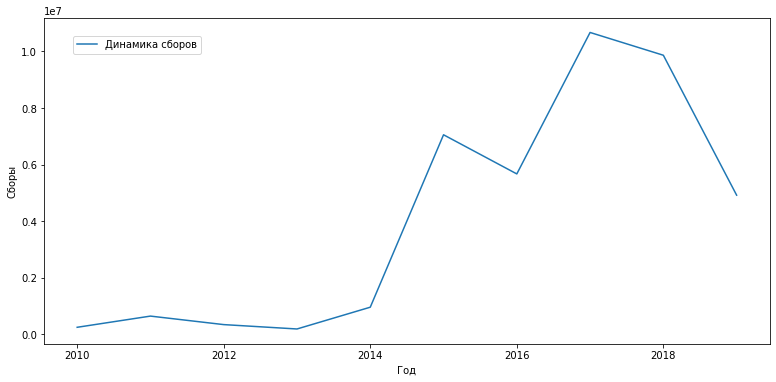

In [80]:
plt.figure(figsize=(13,6))
sns.lineplot(data=for_plot, legend = False, label= 'Динамика сборов')
plt.xlabel('Год')
plt.ylabel('Сборы')
plt.figlegend(loc='upper left',bbox_to_anchor=(0.15, 0.85))
plt.show();

Как видим по графику, медианная сумма сборов была максимальной в 2017 году - 10 668 801.50 рублей. Однако, заметим, что до 2014 года показатели были очень низкими, а затем резкий скачок в 2015  году. Здесь можно сделать предположение, что в датасете много неверных или неполных данных, что сильно исказил результат. Проверить все данные на валидность не можем, поэтому будем работать с тем, что имеем.

### С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

Построим таблицу, где будут указаны средняя и медианная сумма сборов для каждого года.

In [57]:
for_plot_merged = (df_merged.groupby('show_start_date_year').agg(box_office_median = ('box_office','median'), box_office_mean = ('box_office','mean')).reset_index())
for_plot_merged['box_office_mean'] = for_plot_merged['box_office_mean'].map(int)
for_plot_merged

,show_start_date_year,box_office_median,box_office_mean
0,2010,245630.00,620147
1,2011,641375.00,3251633
2,2012,340584.50,621957
3,2013,186090.00,1766002
4,2014,955970.50,65232123
5,2015,7051662.60,85327348
6,2016,5667952.00,99610995
7,2017,10668801.50,138752319
8,2018,9863417.75,106583280
9,2019,4916391.25,93846649


Ориентируясь на динамику суммы, можно сделать несколько разных выводов. Киноиндустрия - бизнес с не стабильным доходом. На сборы могут влиять очень много разных факторов, поэтому в таблице видим суммы, которые год к году могут, как расти, так и снижаться. С другой стороны, данные просто могут быть недостоверными или неполными, из-за показатели на графике могут так варьироваться.

### Выделите имена продюсеров из столбца producer. У кого из них самый высокий средний рейтинг фильмов?

Мы скопировали текущий датасет и назвали его "df_producer", чтобы при изменении не потерять другие данные. Далее данные из столбца "producer" разделили, потому что нам нужно узнать именно одного продюссера, у которого самый высокий средний рейтинг фильмов. Так как у одного фильма может быть несколько продюссеров, то все данные указаны в одной строке. После этого мы для каждого продюссера скопируем данные фильма и укажем их отдельной строкой.

In [60]:
df_producer = df_merged

In [61]:
df_producer['producer'] = df_producer['producer'].str.split(', ')

In [62]:
df_producer = df_producer.explode('producer')

In [63]:
df_producer['producer'].value_counts().head(10)

С.Сельянов         76
П.Смирнов          68
И.Попов            47
Джейсон Блум       45
Дмитрий Ловейко    38
А.Боярский         37
А.Златопольский    35
В.Воля             30
Г.Малков           29
Е.Головин          29
Name: producer, dtype: int64

На первый взгляд можем заметить, что С.Сельянов, П.Смирнов, И.Попов и Джейсон Блум участвовали в продюссировании количества фильмов.

In [64]:
df_producer.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_date_year
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,Дэвид Валдес,«18+» - запрещено для детей,NaN,NaN,NaN,Прочее,7.2,"боевик,драма,мелодрама",NaN,2015
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,Кевин Костнер,«18+» - запрещено для детей,NaN,NaN,NaN,Прочее,7.2,"боевик,драма,мелодрама",NaN,2015
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,Джейк Эбертс,«18+» - запрещено для детей,NaN,NaN,NaN,Прочее,7.2,"боевик,драма,мелодрама",NaN,2015


Конвертируем данные в столбце "rating" в числовые знанчения, чтобы дальше можно было посчитать среднее значение.

In [65]:
df_producer['ratings'] = pd.to_numeric(df_producer['ratings'], errors='coerce')

In [66]:
df_producer[df_producer['ratings'] < 11.0].sort_values(by='ratings', ascending=False).head(7)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_date_year
1337,Друзья друзей,111014513,2013-12-19T12:00:00.000Z,Художественный,"ООО ""ЕМ Продакшн""",Россия,А.Аксененко,Г.Малков,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Прочее,9.2,"комедия,мелодрама",NaN,2013
1337,Друзья друзей,111014513,2013-12-19T12:00:00.000Z,Художественный,"ООО ""ЕМ Продакшн""",Россия,А.Аксененко,В.Поляков,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Прочее,9.2,"комедия,мелодрама",NaN,2013
1337,Друзья друзей,111014513,2013-12-19T12:00:00.000Z,Художественный,"ООО ""ЕМ Продакшн""",Россия,А.Аксененко,Г.Андреасян,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Прочее,9.2,"комедия,мелодрама",NaN,2013
1337,Друзья друзей,111014513,2013-12-19T12:00:00.000Z,Художественный,"ООО ""ЕМ Продакшн""",Россия,А.Аксененко,С.Андреасян,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Прочее,9.2,"комедия,мелодрама",NaN,2013
6638,Побег из Шоушенка,121029519,2019-10-18T12:00:00.000Z,Художественный,"Уорнер Броз. Пикчерз, Кастл Рок Интертейнмент",США,Фрэнк Дарабонт,Дэвид В.Лестер,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Прочее,9.1,драма,NaN,2019
6638,Побег из Шоушенка,121029519,2019-10-18T12:00:00.000Z,Художественный,"Уорнер Броз. Пикчерз, Кастл Рок Интертейнмент",США,Фрэнк Дарабонт,Лиз Глоцер,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Прочее,9.1,драма,NaN,2019
6638,Побег из Шоушенка,121029519,2019-10-18T12:00:00.000Z,Художественный,"Уорнер Броз. Пикчерз, Кастл Рок Интертейнмент",США,Фрэнк Дарабонт,Ники Марвин,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Прочее,9.1,драма,NaN,2019


Самый высокий рейтинг у фильма "Друзья друзей", который продюссировали 4 продюссера. Рейтинг - 9.2.

In [67]:
df_producer['producer'].value_counts().index.sort_values()

Index(['', '             АО "Телекомпания"', ' А.Златопольский', ' А.Кардона',
       ' А.Розенберг', ' А.Шальопа', ' Анатол Ничке', ' Бенджамин Херрман',
       ' В.Сотсков', ' Вин Дизель',
       ...
       'Ясутака Ханада', 'Яцек Дросио', 'Яэль Абекассис', 'Яэль Бергман',
       'Яэль Фогель', 'и др.', 'колин Вэйнс', 'кристиан Колсон',
       'лайза Кортес', 'сэр Дональд Гордон'],
      dtype='object', length=9272)

Если посмотреть детальнее на разделенные данные, то увидим, что в нём есть пустые поля и пробелы. Нужно избавиться от них и только потом делать расчеты.

In [68]:
df_producer['producer'] = df_producer['producer'].replace(r'^\s*$', np.nan, regex=True)

In [69]:
df_producer['producer'].value_counts().index.sort_values()

Index(['             АО "Телекомпания"', ' А.Златопольский', ' А.Кардона',
       ' А.Розенберг', ' А.Шальопа', ' Анатол Ничке', ' Бенджамин Херрман',
       ' В.Сотсков', ' Вин Дизель', ' Г.Андреасян',
       ...
       'Ясутака Ханада', 'Яцек Дросио', 'Яэль Абекассис', 'Яэль Бергман',
       'Яэль Фогель', 'и др.', 'колин Вэйнс', 'кристиан Колсон',
       'лайза Кортес', 'сэр Дональд Гордон'],
      dtype='object', length=9271)

In [70]:
df_producer.groupby('producer').agg(ratings_mean = ('ratings','mean')).reset_index().sort_values(by = 'ratings_mean', ascending=False)

,producer,ratings_mean
5876,Ники Марвин,9.1
3044,Дэвид В.Лестер,9.1
9162,Ю.Осетинская,9.0
1371,В.Меньшов,8.8
8680,Э Мэфилм Дайлог Студио,8.8
...,...,...
9244,Ян Чжэньхуа,NaN
9249,Янгци Ши,NaN
9263,Яэль Абекассис,NaN
9266,и др.,NaN


Самый высокий средний рейтинг фильмов у продюссеров Ники Марвин, Дэвид В.Лестер и Ю.Осетинская. Давайте посмотрим на их фильмы.


In [71]:
df_producer[df_producer['producer'] == 'Ники Марвин']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_date_year
6638,Побег из Шоушенка,121029519,2019-10-18T12:00:00.000Z,Художественный,"Уорнер Броз. Пикчерз, Кастл Рок Интертейнмент",США,Фрэнк Дарабонт,Ники Марвин,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Прочее,9.1,драма,NaN,2019


In [72]:
df_producer[df_producer['producer'] == 'Дэвид В.Лестер']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_date_year
6638,Побег из Шоушенка,121029519,2019-10-18T12:00:00.000Z,Художественный,"Уорнер Броз. Пикчерз, Кастл Рок Интертейнмент",США,Фрэнк Дарабонт,Дэвид В.Лестер,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Прочее,9.1,драма,NaN,2019


In [73]:
df_producer[df_producer['producer'] == 'Ю.Осетинская']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_date_year
5510,"Анимационный фильм ""Малышарики 3"", серия ""Слон""",114005018,2018-08-28T12:00:00.000Z,Анимационный,"ООО ""Продюсерский центр ""Рики""",Россия,М.Мошкова,Ю.Осетинская,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Прочее,NaN,NaN,NaN,2018
5511,"Анимационный фильм ""Малышарики 3"", серия ""Нужн...",114005118,2018-08-27T12:00:00.000Z,Анимационный,"ООО ""Продюсерский центр ""Рики""",Россия,М.Мошкова,Ю.Осетинская,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Прочее,9.0,"мультфильм,детский,семейный",NaN,2018
5512,"Анимационный фильм ""Малышарики 3"", серия ""Дом ...",114005218,2018-08-27T12:00:00.000Z,Анимационный,"ООО ""Продюсерский центр ""Рики""",Россия,М.Мошкова,Ю.Осетинская,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Прочее,NaN,NaN,NaN,2018
5513,"Анимационный фильм ""Малышарики 3"", серия ""Брыз...",114005318,2018-08-27T12:00:00.000Z,Анимационный,"ООО ""Продюсерский центр ""Рики""",Россия,М.Мошкова,Ю.Осетинская,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Прочее,NaN,NaN,NaN,2018
5514,"Анимационный фильм ""Малышарики 3"", серия ""Пода...",114005418,2018-08-27T12:00:00.000Z,Анимационный,"ООО ""Продюсерский центр ""Рики""",Россия,М.Мошкова,Ю.Осетинская,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Прочее,9.0,"мультфильм,детский,семейный",NaN,2018


Как видим, у первых двух только один с высоким рейтингом, поэтому такой показатель, а вот у Ю.Осетинская фильмов больше, но рейтинг указан только у двух. Так как данные неполные, то сложно сделать определенный вывод. Если ориентироваться только на рейтинг, имеющихся фильмов, то конечно самый высокий средний рейтинг у двух проюссеров одного успешного фильма. Если учитывать количество фильмов в первую очередь и только потом на их рейтинг, то лидируем И.Попов, у которого 47 фильмов и средний рейтинг 5.98. 

In [74]:
df_producer[df_producer['producer'] == 'С.Сельянов'].groupby(['producer']).mean()

,refundable_support,nonrefundable_support,budget,ratings,box_office,show_start_date_year
producer,,,,,,
С.Сельянов,1.934783e+07,5.434783e+07,2.460253e+08,5.892982,1.006097e+08,2015.105263


In [75]:
df_producer[df_producer['producer'] == 'П.Смирнов'].groupby(['producer']).mean()

,refundable_support,nonrefundable_support,budget,ratings,box_office,show_start_date_year
producer,,,,,,
П.Смирнов,NaN,NaN,NaN,4.175,3.327404e+06,2017.661765


In [76]:
df_producer[df_producer['producer'] == 'И.Попов'].groupby(['producer']).mean()

,refundable_support,nonrefundable_support,budget,ratings,box_office,show_start_date_year
producer,,,,,,
И.Попов,60000000.0,75000000.0,255076950.0,5.981818,3.477291e+07,2016.297872


In [77]:
df_producer[df_producer['producer'] == 'Джейсон Блум'].groupby(['producer']).mean()

,refundable_support,nonrefundable_support,budget,ratings,box_office,show_start_date_year
producer,,,,,,
Джейсон Блум,NaN,NaN,NaN,5.948837,1.102176e+08,2015.333333


In [78]:
df_producer.query('producer == producer and producer.str.contains("Бекмам")', engine = 'python').producer.unique()

array(['Тимур Бекмамбетов', 'Т.Бекмамбетов', 'Ж.Бекмамбетова'],
      dtype=object)

In [79]:
df_producer.query('producer == producer and producer.str.contains("Жилибер|Жийибер|Жильбер|Жилльберт")', engine = 'python').producer.unique()

array(['Шарль Жийибер', 'Шарль Жильбер', 'Шарль Жилибер',
       'Шарль Жилльберт', 'Ш. Жилибер'], dtype=object)